# Human bread making

## Data Explore

In [2]:
from scipy import io

In [14]:
f = 'C:/Users/Lauren/Data/ErikData/1000.mat'
data = io.loadmat(f)
data.keys()

dict_keys(['__version__', 'ev_times', '__header__', 'oz_trial_data', 'oz_rest_data', 'ev_types', '__globals__'])

In [15]:
data['oz_rest_data']
data['__header__']

b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Sep 26 22:52:54 2016'

In [34]:
len(getEEGdata(data_path,1001))


60000

## Setting up the Dough

In [55]:
from SpectralCV import ecog_pipe as ep
import numpy as np
import scipy as sp
import scipy.io as io
import scipy.signal as sig
import math as math
import random 
from scipy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [33]:
def getEEGdata(mydata_path, sub):
    data_path = mydata_path
    matfile = io.loadmat(data_path + '%d.mat'%(sub), squeeze_me=True)
    data = matfile['oz_rest_data']
    return data

In [35]:
def sublist():
    return np.concatenate((np.arange(1000,1015), np.arange(2000,2014)),axis=0)

## Making the Bread

In [63]:
def humanBread(sublist,fs,nperseg,noverlap):
    bread = np.zeros((len(sublist), 501))
    for i, sub in enumerate(sublist):
        data = getEEGdata(data_path,sub)
        f_axis, f_time, spg = sig.spectrogram(data, fs=fs, nperseg=nperseg, noverlap=noverlap)
        bread[i][:] = ep.scv(spg)
    return bread

In [64]:
humanBread(sublist(),1000,1000,500)

array([[ 1.4477998 ,  1.07491469,  1.00579703, ...,  1.00661695,
         0.91924357,  1.6134336 ],
       [ 1.46136594,  1.65551281,  0.91353869, ...,  0.92230844,
         0.89107889,  1.51238656],
       [ 1.8432579 ,  4.40167141,  1.37370181, ...,  1.22741401,
         1.34535563,  1.43794   ],
       ..., 
       [ 1.41325414,  0.98340559,  1.02470767, ...,  1.24184382,
         1.25478041,  1.24426603],
       [ 1.24931526,  1.22491693,  0.86814433, ...,  0.86679512,
         0.99015808,  1.29494059],
       [ 1.2983247 ,  0.98642606,  1.08787155, ...,  0.91274434,
         1.19400859,  1.39646256]])

In [53]:
for i, sub in enumerate(sublist()):
    data = getEEGdata(data_path,sub)
    f_axis, f_time, spg = sig.spectrogram(data, fs=1000., nperseg=1000, noverlap=500)
    bread[i][:] = ep.scv(spg)  
    # plt.figure(i)
    # plt.loglog(ep.scv(spg))

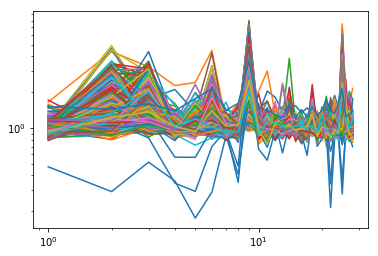

In [57]:
plt.loglog(bread[:][:]);

In [45]:
data = getEEGdata(data_path,1000)
f_axis, f_time, spg = sig.spectrogram(data, fs=1000., nperseg=1000, noverlap=500)
frequency = len(f_axis)
bread = np.zeros((len(sublist()), frequency))

In [32]:
data_path = "C:/Users/Lauren/Data/ErikData/"

In [49]:
from SpectralCV import ecog_pipe as ep

In [46]:
bread.shape

(29, 501)

In [58]:
#create h5py path to chibi bread
import h5py
scvh5 = h5py.File('scv.h5', 'a')
human = scvh5.create_group("human")
human.create_dataset('oz', data=bread)
scvh5.close()

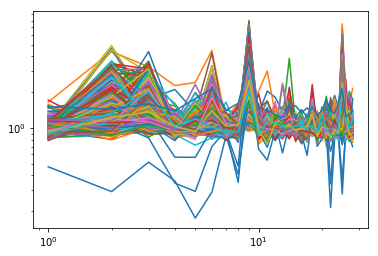

In [59]:
import matplotlib.pyplot as plt
import h5py
#load data from h5 
h5_file = '../Voytek/scv.h5'
# plotting
with h5py.File(h5_file, 'r') as h5:
    bread = h5['human/oz']
    plt.loglog(bread[:][:])